In [2]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualization
from sklearn.linear_model import LinearRegression  # For linear regression models
from scipy.stats import t  # For statistical functions
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.metrics import silhouette_score  # To evaluate clustering quality
from sklearn.preprocessing import RobustScaler  # To scale data robustly against outliers
import warnings  # To manage warnings
# Suppress warnings
warnings.filterwarnings("ignore")  # Ignore warnings to avoid clutter during output

In [4]:
# Loading the dataset
data = pd.read_csv('starbucks.csv') 

In [6]:
data.head()   # .head() dispalys top 5 rows to inspect the data.

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [44]:
data.columns = data.columns.str.strip()

In [46]:
data.info()      # .info() used to provides the information of the data and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [10]:
numeric_columns = data.select_dtypes(include=['number'])  # Selecting only numeric columns from the dataset

In [12]:
numeric_columns.describe()                               # using .describe() to see some basic stats of the data.

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [14]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Calories,193.871901,185.0,102.863303,0.378396,-0.082197
Trans Fat (g),1.307025,0.5,1.640259,1.694825,2.926302
Saturated Fat (g),0.037603,0.0,0.071377,1.859603,2.614893
Sodium (mg),6.363636,5.0,8.630257,1.680660,2.510714
Total Carbohydrates (g),128.884298,125.0,82.303223,0.477843,-0.260343
Cholesterol (mg),35.991736,34.0,20.795186,0.389013,-0.384036
Dietary Fibre (g),0.805785,0.0,1.445944,2.893022,9.359062
Sugars (g),32.962810,32.0,19.730199,0.468155,-0.209685
Protein (g),6.978512,6.0,4.871659,0.707466,-0.229418


In [16]:
def draw_corr_heatmap(df):
    """
    GeneratesGenerates a correlation heatmap for numerical columns in the dataset. displaying triangle of correlations.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Mask the half of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create the heatmap with the mask applied
    plt.figure(figsize=(10, 8), dpi=150)
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
    plt.title('Half Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

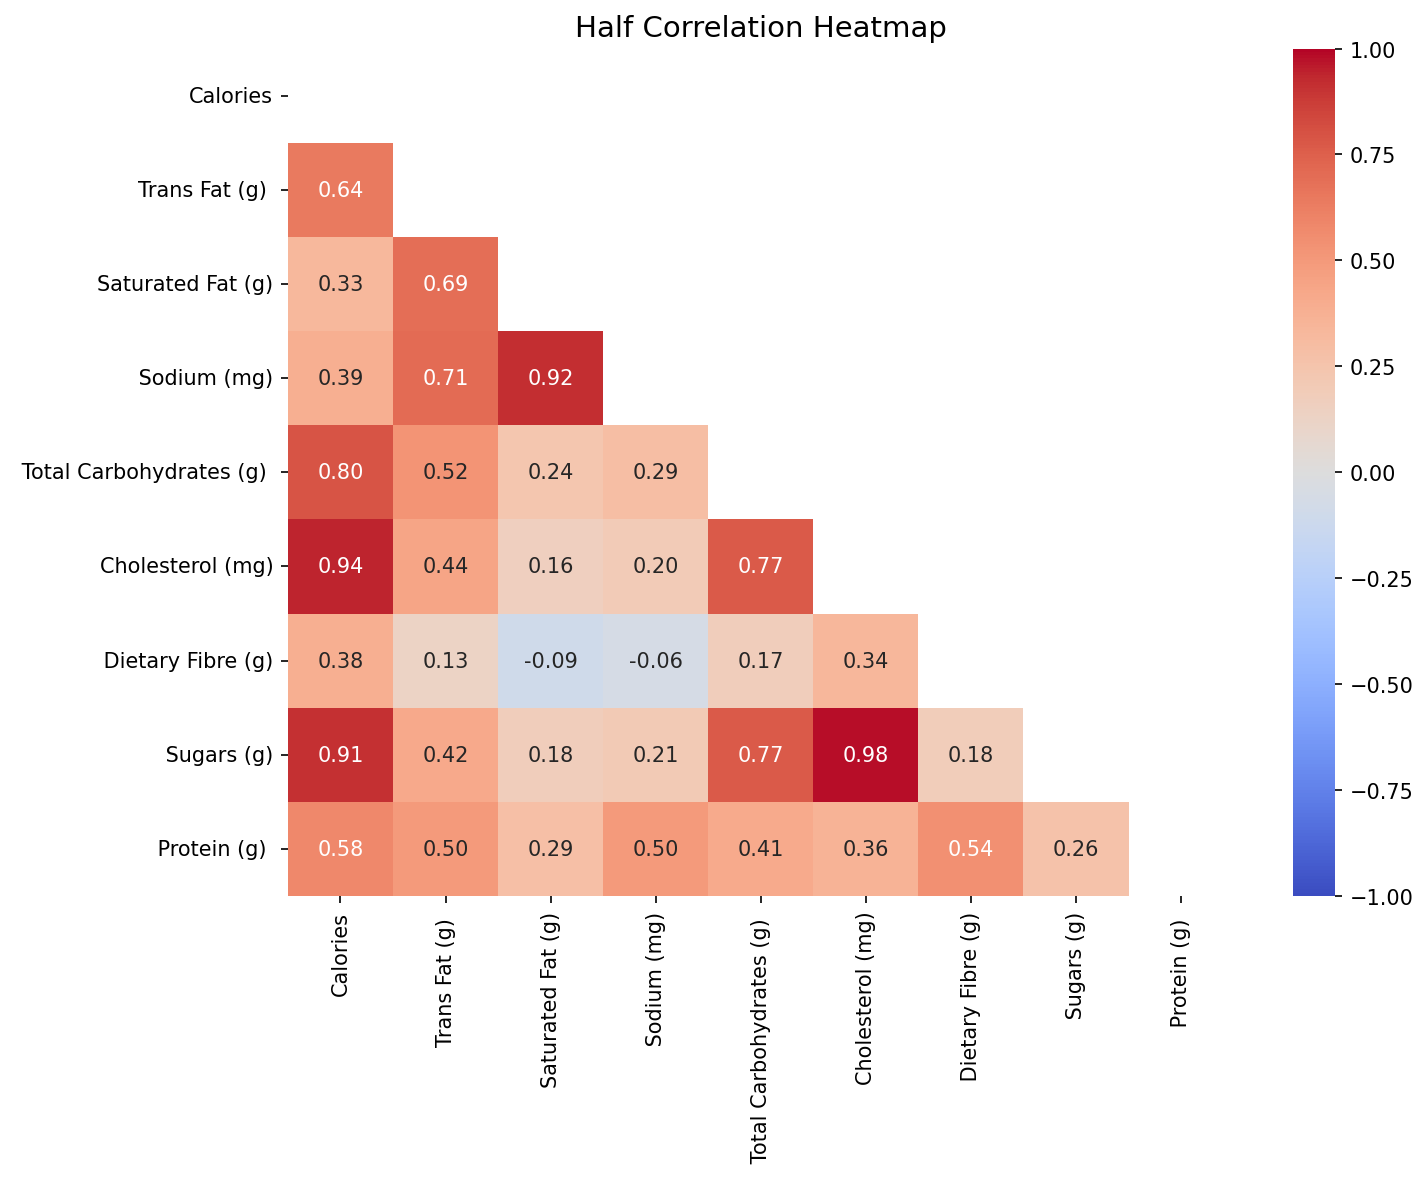

In [18]:
draw_corr_heatmap(numeric_columns)

In [32]:
def bar_chart(data):
    """
    Plots a Bar chart for beverage categories using Seaborn
    """
    # Assigning to a variable
    category_counts = data['Beverage_category'].value_counts().reset_index()
    category_counts.columns = ['Beverage_category', 'Count']
    
    # Create bar plot with seaborn
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Beverage_category', y='Count', data=category_counts, palette='Set2')
    
    # Customize the plot
    plt.title('Beverage Category Distribution', fontsize=16)
    plt.xlabel('Beverage_category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add grid for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

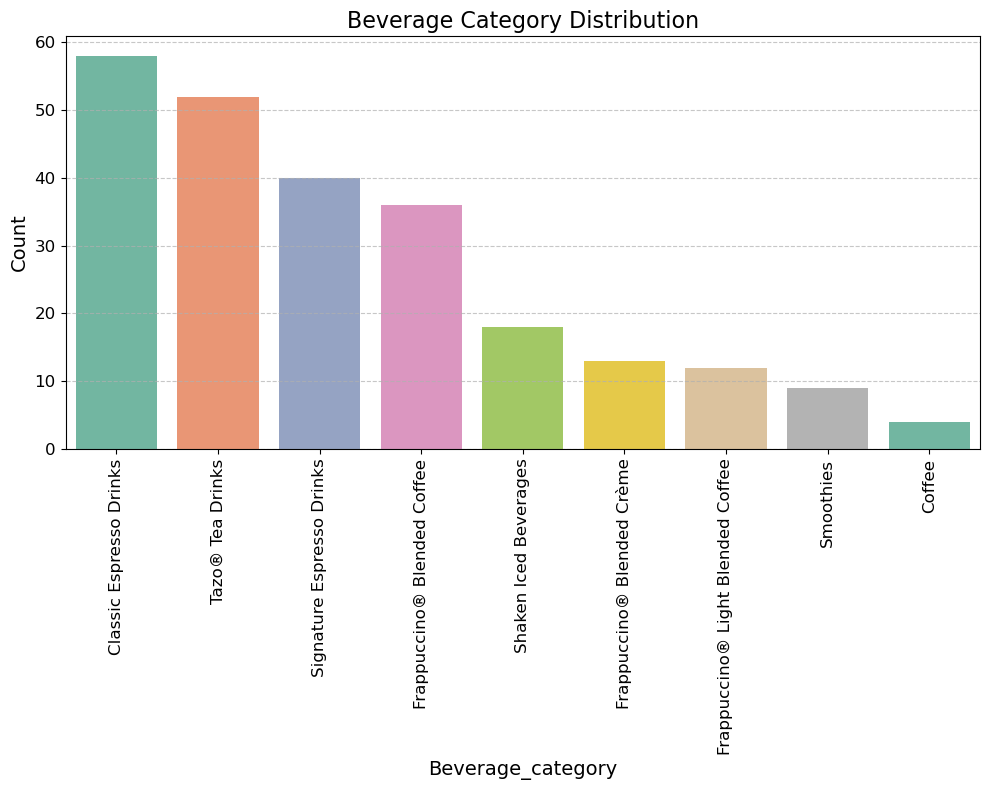

In [34]:
bar_chart(data)

In [36]:
def simple_linear_fit_with_predictions(df, x_col, y_col, new_x=None):
    """
    Fits a simple linear regression model, plots the regression line with confidence intervals, 
    and optionally predicts values for new data points.
    
    Parameters:
    - df : DataFrame : The dataset containing the data.
    - x_col : str : The name of the independent variable (feature).
    - y_col : str : The name of the dependent variable (target).
    - new_x : array-like, optional : New data points to predict. Default is None.
    
    Returns:
    - model : LinearRegression : The trained linear regression model.
    - new_y_pred : array-like : Predictions for new data points (if provided).
    """
    # Step 1: Extract the data for X (independent) and Y (dependent) variables
    x = df[x_col].values.reshape(-1, 1)  # Reshape for a single feature
    y = df[y_col].values  # Dependent variable (target)

    # Step 2: Train the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Step 3: Generate predictions for the original data
    y_pred = model.predict(x)
    
    # Step 4: Predict for new data points if provided
    new_y_pred = None
    if new_x is not None:
        new_x = np.array(new_x).reshape(-1, 1)
        new_y_pred = model.predict(new_x)
        print("Predictions for new data points:")
        for i, pred in enumerate(new_y_pred):
            print(f"  x = {new_x[i][0]:.2f}, Predicted y = {pred:.2f}")

    # Step 5: Plot the original data and the linear regression line with confidence intervals
    plt.figure(figsize=(10, 6))
    
    # Scatter plot and regression line with confidence intervals
    sns.regplot(x=x.flatten(), y=y, ci=95, scatter_kws={'color': 'yellow', 's': 50, 'alpha': 0.6}, 
                line_kws={'color': 'royalblue', 'linewidth': 3, 'linestyle': '--'})
    
    # Title and labels
    plt.title(f'Linear Regression of {y_col} vs {x_col} with 95% Confidence Interval', fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(['Data points', 'Regression line', 'Confidence interval'], loc='upper left', fontsize=12)

    # Additional plot customization
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return model, new_y_pred

Predictions for new data points:
  x = 40.00, Predicted y = 43.29
  x = 50.00, Predicted y = 53.66
  x = 35.00, Predicted y = 38.10


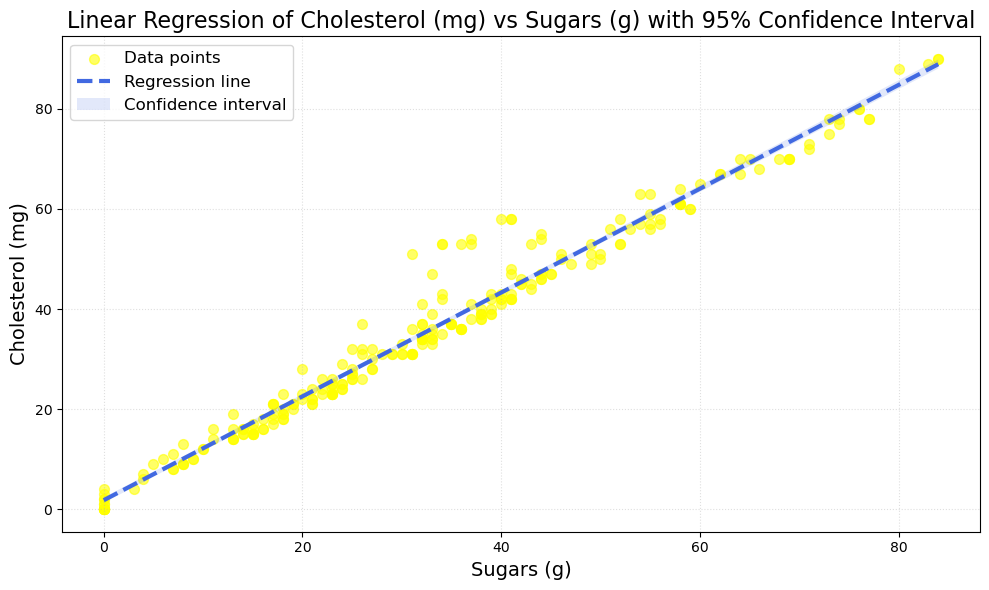

In [50]:
new_x = [40,50,35]  # New x-values for prediction
model, new_y_pred = simple_linear_fit_with_predictions(data, 'Sugars (g)', 'Cholesterol (mg)', new_x)

In [52]:
data_for_clustering = data[['Sugars (g)', 'Cholesterol (mg)']].copy()

# Step 2: Scale the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [54]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia

In [56]:
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")

2 clusters silhouette score = 0.54
3 clusters silhouette score = 0.56
4 clusters silhouette score = 0.50
5 clusters silhouette score = 0.52
6 clusters silhouette score = 0.52
7 clusters silhouette score = 0.50
8 clusters silhouette score = 0.50
9 clusters silhouette score = 0.49
10 clusters silhouette score = 0.51
Optimal number of clusters = 3


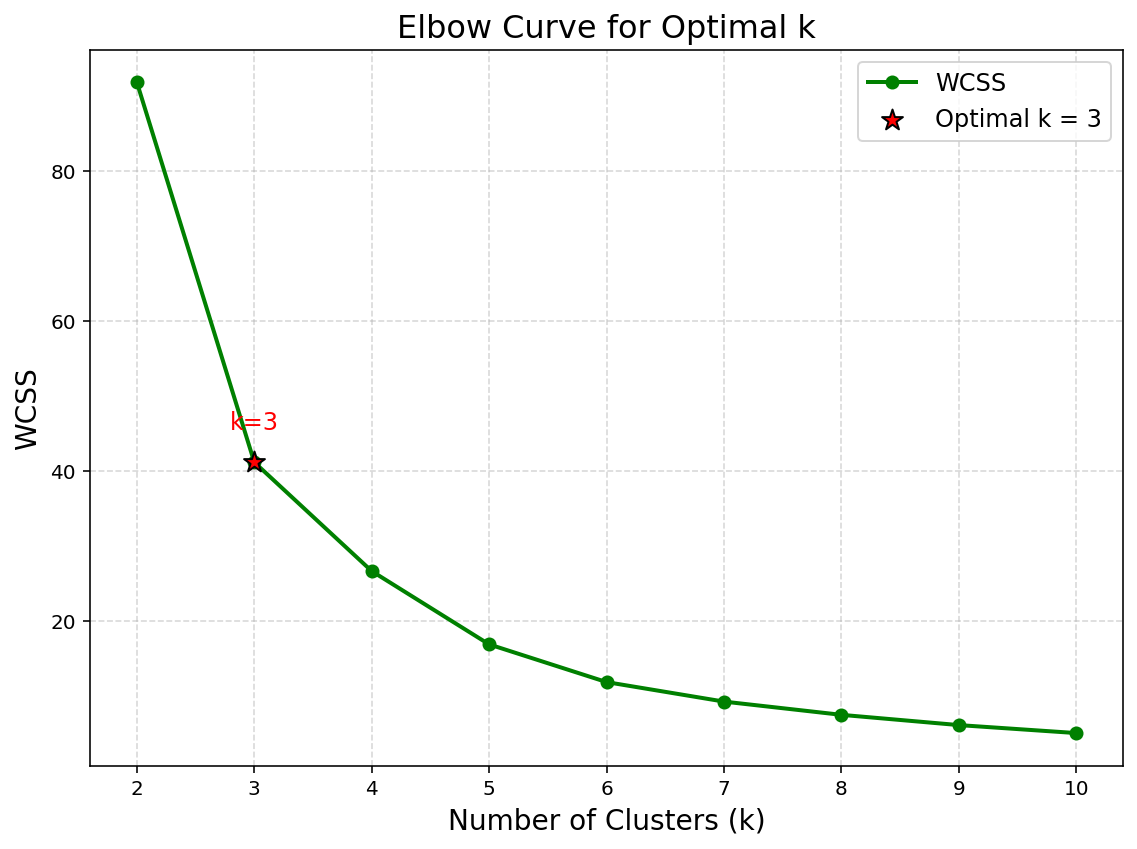

In [57]:
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    '''
    Elbow Curve plot to determine the best number of clusters (k)
    '''
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='o', color='green', label='WCSS', markersize=6, linewidth=2)
    
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='red', edgecolor='black', s=120, zorder=5, marker='*', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(f'k={optimal_clusters}',
                xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
                xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
                fontsize=12, color='red', ha='center')
    
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)

In [69]:
def plot_kmeans_results(labels, original_data, centers, x_centers, y_centers, center_labels, k):
    """
    Plots the clustering results for the current number of clusters.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot the original data points, colored by their cluster labels
    sns.scatterplot(x=original_data[:, 0], y=original_data[:, 1], hue=labels, palette='deep', s=100, alpha=0.6)
    
    # Plot the cluster centers
    plt.scatter(x_centers, y_centers, color='black', marker='X', s=200, label="Cluster Centers")
    
    # Customize plot
    plt.title(f"K-Means Clustering with {k} Clusters", fontsize=16)
    plt.xlabel("Sugars", fontsize=12)
    plt.ylabel("cholestrol", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

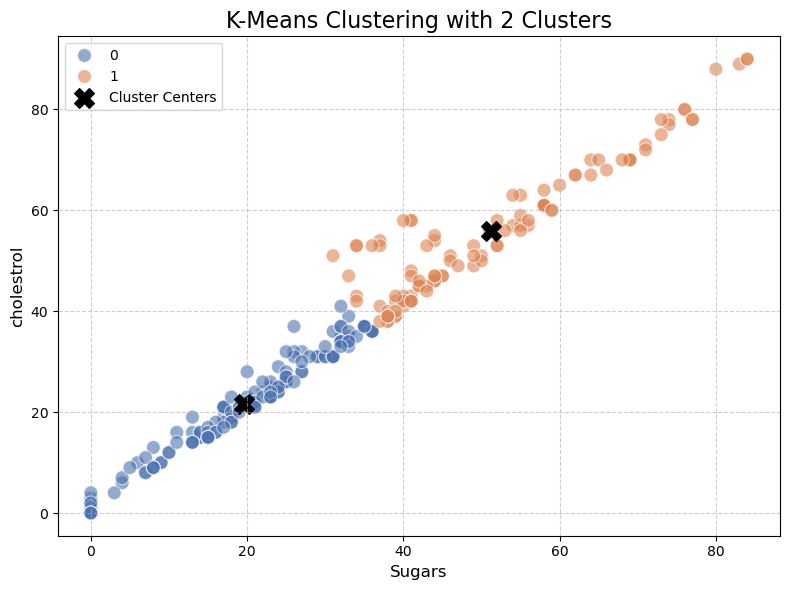

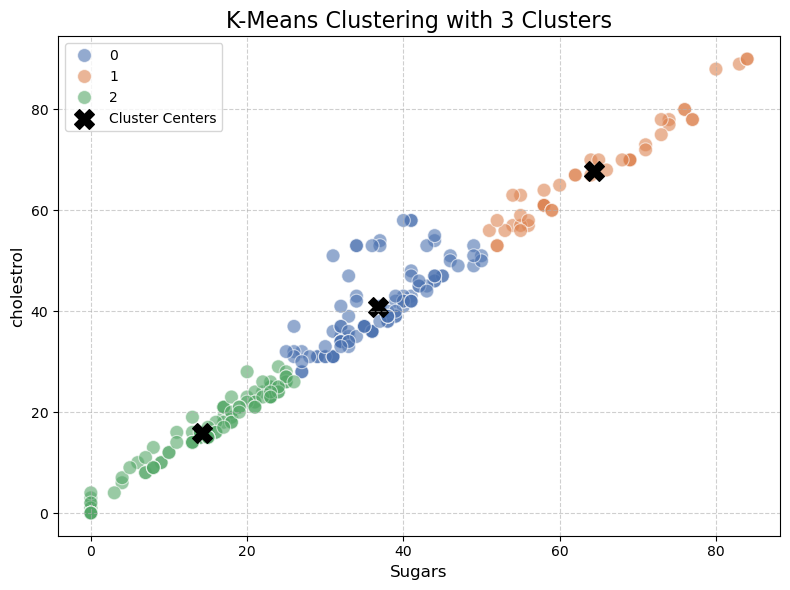

In [71]:
# Perform KMeans clustering for the optimal number of clusters
def perform_kmeans_clustering(original_data, normalized_data, scaler, cluster_range):
    """
    Performs K-Means clustering for a given range of k values and visualizes the results.
    Parameters: original_data (ndarray), normalized_data (ndarray), scaler (MinMaxScaler), cluster_range (iterable).
    """
    for k in cluster_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(normalized_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = centers[:, 0]
        y_centers = centers[:, 1]
        center_labels = kmeans.predict(kmeans.cluster_centers_)
        
        # Plot the results for the current k value
        plot_kmeans_results(labels, original_data, centers, x_centers, y_centers, center_labels, k)

# Inverse normalization for accurate plotting of the original data
inverse_norm = scaler.inverse_transform(scaled_data)

# Step 8: Perform KMeans clustering for k values in the range from 2 to 3
perform_kmeans_clustering(inverse_norm, scaled_data, scaler, cluster_range=range(2, 4))
